In [1]:
%matplotlib inline
from tools import *

# Ch07 处理文本数据

## 7.1 用字符串表示的数据类型

四种类型的字符串数据：
- 分类数据（Categorical Data）是来自固定列表的数据
- 可以在语义上映射为类别的自由字符串：利用最常见的条目来选择类别，可以自定义类别，
使用户回答对应用有意义。
- 结构化字符串数据：数据存在内存的结构，这种类型的字符串难以解析，其处理方法依赖于上下文和具体领域。
- 文本数据：是自由格式，由短语和句子组成。

在文本分析的语境中：
- 数据集被称为语料库（Corpus）
- 每个由单个文本表示的数据点称为文档（Document）
- 文本分析属于信息检索（Information Retrieval，IR）和自然语言处理（Natural Language Processing，NLP）

## 7.2 示例应用：电影评论的情感分析

- 使用由Stanford的Andrew Maas收集的
互联网电影资料库（Internet Movie Database，IMDb）网站的电影评论数据集。

注：下面三个 cell 是导入数据用的，适合 Linux 平台，建议不运行。而是自己下载后解压缩到 data 目录中。

In [2]:
! wget -nc http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz -P data
! tar xzf data/aclImdb_v1.tar.gz --skip-old-files -C data

File ‘data/aclImdb_v1.tar.gz’ already there; not retrieving.



In [3]:
!tree -dL 2 data/aclImdb

data/aclImdb
├── test
│   ├── neg
│   └── pos
└── train
    ├── neg
    ├── pos
    └── unsup

7 directories


In [4]:
!rm -r data/aclImdb/train/unsup

In [2]:
from sklearn.datasets import load_files

reviews_train = load_files("data/aclImdb/train/")
# load_files returns a bunch, containing training texts and training labels
text_train, y_train = reviews_train.data, reviews_train.target
print("text_train 的数据类型: {}".format(type(text_train)))
print("text_train 的数据长度: {}".format(len(text_train)))
print("text_train[6] 的具体内容:\n{}".format(text_train[6]))

text_train 的数据类型: <class 'list'>
text_train 的数据长度: 25000
text_train[6] 的具体内容:
b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [3]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [4]:
# 显示数据的类别（二分类问题）
np.unique(y_train)

array([0, 1])

In [5]:
print("训练数据集中每个类别样本数量")
print("Samples per class (training): {}".format(np.bincount(y_train)))

训练数据集中每个类别样本数量
Samples per class (training): [12500 12500]


In [6]:
reviews_test = load_files("data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("测试数据集中文档数目")
print("Number of documents in test data: {}".format(len(text_test)))
print("测试数据集中每个类别样本数量")
print("Samples per class (test): {}".format(np.bincount(y_test)))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

测试数据集中文档数目
Number of documents in test data: 25000
测试数据集中每个类别样本数量
Samples per class (test): [12500 12500]


## 7.3 将文本数据表示为词袋

词袋（bag-of-words）表示是用于机器学习的文本表示中最简单、最有效、最常用的方法。
用这种表示方式时，舍弃了输入文本中的大部分结构，只计算语料库中每个单词每个文本中的出现频次。

计算词袋的三个步骤：

1.   分词（tokenization）：将每个文档划分为出现在其中的单词｛称为词例（token）｝，比如：按照空格和标点划分。
2.   构建词表（vocabulary building）：收集一个词表，里面包含出现在输入文本中的所有词，并对它们进行编号，比如：按照字母顺序排序
3.   编码（encoding）：对于每个文档，计算词表中每个单词在该文档中的出现频次

![bag_of_words](images/bag_of_words.png)

### 7.3.1 将词袋应用于简单的数据集

词袋表示使用CountVectorizer类实现，这个类是一个变换器（transformer）。

In [7]:
bards_words =["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [9]:
print("字典大小: {}".format(len(vect.vocabulary_)))
print("字典内容:\n {}".format(vect.vocabulary_))

字典大小: 13
字典内容:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [10]:
bag_of_words = vect.transform(bards_words)
print("词袋（bag_of_words）: {}".format(repr(bag_of_words)))

词袋（bag_of_words）: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [11]:
print("词袋的稠密表示")
print("Dense representation of bag_of_words:\n{}".format(
    bag_of_words.toarray()))

词袋的稠密表示
Dense representation of bag_of_words:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


### 7.3.2 将词袋应用于电影评论

为了减少特征，可以删除信息量比较小的单词。
一种方法是设置min_df(5)表示至少出现在5个文档中的单词才被统计，
可以有效地减少数字、生僻单词和拼写错误的单词。也可以加速模型的处理速度，提高模型的可解释性。
但是对于提高模型的精度没有帮助。

In [12]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [13]:
feature_names = vect.get_feature_names()
print("特征数目: {}".format(len(feature_names)))

特征数目: 74849


In [14]:
print("前 20 个特征:\n{}".format(feature_names[:20]))

前 20 个特征:
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']


In [15]:
print("第 20010 到 20030 个特征:\n{}".format(feature_names[20010:20030]))

第 20010 到 20030 个特征:
['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']


In [16]:
print("每 2000 个特征:\n{}".format(feature_names[::2000]))

每 2000 个特征:
['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("模型交叉验证的平均精度: {:.2f}".format(np.mean(scores)))

模型交叉验证的平均精度: 0.88


In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
show_title("模型交叉验证")
print("最佳得分: {:.2f}".format(grid.best_score_))
print("最佳参数: ", grid.best_params_)

=============== >模型交叉验证< ===============
最佳得分: 0.89
最佳参数:  {'C': 0.1}


In [19]:
X_test = vect.transform(text_test)
print("基于测试集的验证效果: {:.2f}".format(grid.score(X_test, y_test)))

基于测试集的验证效果: 0.88


In [20]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train with min_df: {}".format(repr(X_train)))
print("注意：跟没有 min_df 相比减少的特征数")

X_train with min_df: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>
注意：跟没有 min_df 相比减少的特征数


In [21]:
feature_names = vect.get_feature_names()
print("前 20 个特征:\n{}".format(feature_names[:20]))

前 20 个特征:
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103']


In [22]:
print("第 20010 到 20030 个特征:\n{}".format(feature_names[20010:20030]))

第 20010 到 20030 个特征:
['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']


In [23]:
print("每 700 个特征:\n{}".format(feature_names[::700]))

每 700 个特征:
['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunciation', 'recipient', 'reviews', 'sas', 'shea', 'sneers', 'steiger', 'swastika', 'thrusting', 'tvs', 'vampyre', 'westerns']


In [24]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print("模型交叉验证的最佳得分: {:.2f}".format(grid.best_score_))

模型交叉验证的最佳得分: 0.89


## 7.4 停用词（stopword）

另一种删除信息量比较小的单词的方法是：删除停用词。
- 特定停用词列表。

还可以设置max_df(100)表示至多出现在100个文档中的单词才被统计。可以加速模型的处理速度，但是会降低模型的精度。

In [25]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("停用词的数目: {}".format(len(ENGLISH_STOP_WORDS)))
print("每间隔 10个 停用词:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

停用词的数目: 318
每间隔 10个 停用词:
['thereupon', 'behind', 'by', 'moreover', 'during', 'take', 'her', 'five', 'top', 'someone', 'eg', 'yours', 'eleven', 'since', 'because', 'found', 'yet', 'may', 'beside', 'neither', 'anyway', 'whereas', 'anyhow', 'ltd', 'with', 'fifteen', 'few', 'thick', 'front', 'amoungst', 'three', 'same']


In [26]:
# Specifying stop_words="english" uses the built-in list.
# We could also augment it and pass our own.
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("删除 不具有信息量的单词(min_df = 5)+停用词的训练数据集：\n{}".format(repr(X_train)))

删除 不具有信息量的单词(min_df = 5)+停用词的训练数据集：
<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [27]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("基于网格搜索的 LogisticRegression 模型学习的交叉验证的最佳得分: {:.2f}".format(grid.best_score_))

基于网格搜索的 LogisticRegression 模型学习的交叉验证的最佳得分: 0.88


## 7.5 用TF-IDF缩放数据

不再删除那些被认作不重要的单词，而是按照预计的特征信息量大小来缩放特征。
-   词频--逆向文档频率（Term Frequency-Inverse Document Frequency，TF-IDF）方法。
    -   对在某个文档中经常出现的术语给予高权重，对于在语料库的许多文档中经常出现的术语给予低权重。
    -   因为在某个文档中经常出现，而在许多文档中不经常出现的术语，可能对文档的内容有很好的描述。
-   $N$ 是 训练集 中的 文档 数量
-   $N_w$ 是 训练集 中出现 单词 的 文档 数量
-   tf（词频）是 单词(word) 在 查询文档(document) 中出现的次数

（提高计算的速度，不改变模型的精度）
\begin{equation*}
\text{tfidf}(w, d) = \text{tf} \log\big(\frac{N + 1}{N_w + 1}\big) + 1
\end{equation*}

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
                     LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("基于网格搜索的 LogisticRegression 模型学习的交叉验证的最佳得分: {:.2f}".format(grid.best_score_))

基于网格搜索的 LogisticRegression 模型学习的交叉验证的最佳得分: 0.89


In [29]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset:
X_train = vectorizer.transform(text_train)
# find maximum value for each of the features over dataset:
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names())

print("由低到高排序 tfidf 值的前 20个特征:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("由高到低排序 tfidf 值的前 20个特征: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))

由低到高排序 tfidf 值的前 20个特征:
['poignant' 'disagree' 'instantly' 'importantly' 'lacked' 'occurred' 'currently' 'altogether' 'nearby' 'undoubtedly' 'directs' 'fond' 'stinker' 'avoided' 'emphasis' 'commented' 'disappoint'
 'realizing' 'downhill' 'inane']
由高到低排序 tfidf 值的前 20个特征: 
['coop' 'homer' 'dillinger' 'hackenstein' 'gadget' 'taker' 'macarthur' 'vargas' 'jesse' 'basket' 'dominick' 'the' 'victor' 'bridget' 'victoria' 'khouri' 'zizek' 'rob' 'timon' 'titanic']


In [30]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("由低到高排序 idf 值的前 20个特征:\n{}".format(
       feature_names[sorted_by_idf[:100]]))

由低到高排序 idf 值的前 20个特征:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with' 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all' 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there'
 'if' 'his' 'out' 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when' 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story' 'which' 'well' 'had' 'me' 'than'
 'much' 'their' 'get' 'were' 'other' 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great' 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any' 'too' 'then'
 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its' 'him']


## 7.6 研究模型的系数

由于特征数量（单词数量）非常多，不能同时查看所有系数，但是可以查看最大系数，并且查看这些系数对应的单词。

Text(0.5, 0.98, '图7-2：在TF-IDF特征上训练的Logistic回归的最大系数和最小系数\n左侧的负系数属于模型找到的表示负面评论的单词----------右侧的正系数属于模型找到的表示正面评论的单词')

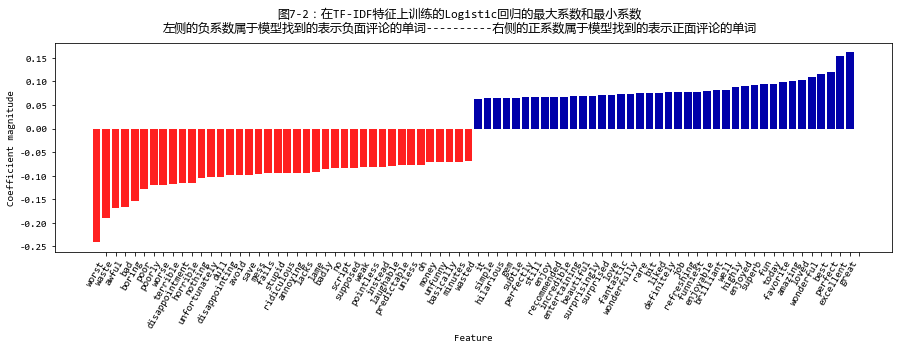

In [31]:
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_,
    feature_names, n_top_features=40)
plt.suptitle("图7-2：在TF-IDF特征上训练的Logistic回归的最大系数和最小系数\n"
                "左侧的负系数属于模型找到的表示负面评论的单词" +
                '-' * 10 +
                "右侧的正系数属于模型找到的表示正面评论的单词")

## 7.7 多个单词的词袋（N元分词）

使用词袋表示忽略了考虑单词顺序（即上下文）。
-   一元分词（Unigram）
-   二元分词（Bigram）
-   三元分词（Trigram）：最常用。
-   N元分词（N-gram）

In [32]:
print("bards_words:\n{}".format(bards_words))

bards_words:
['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [33]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
show_subtitle("1-gram")
print("字典大小: {}".format(len(cv.vocabulary_)))
print("字典内容:\n{}".format(cv.get_feature_names()))

--------------- >1-gram< ---------------
字典大小: 13
字典内容:
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [34]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
show_subtitle("2-gram")
print("字典大小: {}".format(len(cv.vocabulary_)))
print("字典内容:\n{}".format(cv.get_feature_names()))

--------------- >2-gram< ---------------
字典大小: 14
字典内容:
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [35]:
print("变换后的数据的稠密表示:\n{}".format(cv.transform(bards_words).toarray()))

变换后的数据的稠密表示:
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [36]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
show_subtitle("3-gram")
print("字典大小: {}".format(len(cv.vocabulary_)))
print("字典内容:\n{}".format(cv.get_feature_names()))

--------------- >3-gram< ---------------
字典大小: 39
字典内容:
['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


In [37]:
show_title("基于N元语法模型建立电影评论数据集的词袋")
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
# running the grid-search takes a long time because of the
# relatively large grid and the inclusion of trigrams
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
              "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(text_train, y_train)
print("最佳得分: {:.2f}".format(grid.best_score_))
print("最佳参数:\n{}".format(grid.best_params_))

=============== >基于N元语法模型建立电影评论数据集的词袋< ===============
最佳得分: 0.91
最佳参数:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


Text(0.5, 0.98, '图7-3：交叉验证平均精度作为参数ngram_range和C的函数的热图可视化\n使用二元分词对精度的提高最明显\n使用三元分词可以得到最佳的精度')

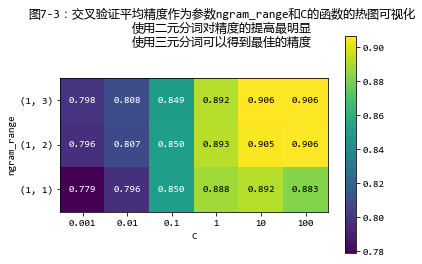

In [38]:
# extract scores from grid_search
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# visualize heat map
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)
plt.suptitle("图7-3：交叉验证平均精度作为参数ngram_range和C的函数的热图可视化\n"
                "使用二元分词对精度的提高最明显\n"
                "使用三元分词可以得到最佳的精度")

Text(0.5, 0.98, '图7-4：同时使用TF-IDF缩放与一元分词、二元分词和三元分词时的最重要的特征\n左侧的负系数属于模型找到的表示负面评论的单词----------右侧的正系数属于模型找到的表示正面评论的单词')

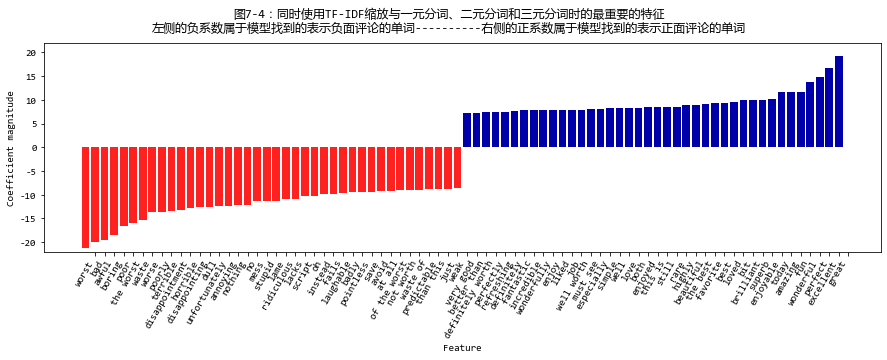

In [39]:
# extract feature names and coefficients
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)
plt.ylim(-22, 22)
plt.suptitle("图7-4：同时使用TF-IDF缩放与一元分词、二元分词和三元分词时的最重要的特征\n"+
                "左侧的负系数属于模型找到的表示负面评论的单词"+
                '-'*10+
                "右侧的正系数属于模型找到的表示正面评论的单词")

Text(0.5, 0.98, '图7-5：模型中三元分词的最重要的特征\n左侧的负系数属于模型找到的表示负面评论的单词，----------右侧的正系数属于模型找到的表示正面评论的单词')

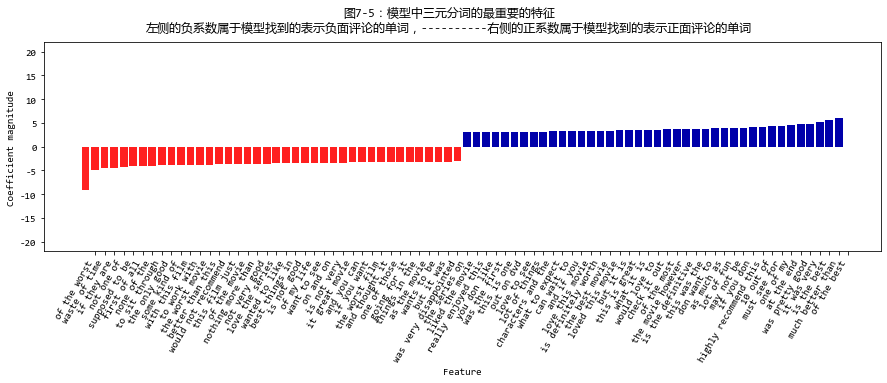

In [40]:
# find 3-gram features
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
# visualize only 3-gram features
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
                                     feature_names[mask], n_top_features=40)
plt.ylim(-22, 22)
plt.suptitle("图7-5：模型中三元分词的最重要的特征\n"+
                "左侧的负系数属于模型找到的表示负面评论的单词，"+
                '-'*10+
                "右侧的正系数属于模型找到的表示正面评论的单词")

## 7.8 词干提取和词形还原

单词的标准化：提取一个单词的某种标准形式。
-   词干提取：基于规则的启发式方法实现
-   词形还原：基于已知单词形式的词典来实现。
    -   词形还原对精度的提高比较有限，在特定任务中先使用最简单的模型，然后再使用更多的技术来提升模型精度。

In [41]:
import spacy
import nltk

# load spacy's English-language models
en_nlp = spacy.load('en_core_web_sm')
# instantiate nltk's Porter stemmer
stemmer = nltk.stem.PorterStemmer()

# define function to compare lemmatization in spacy with stemming in nltk
# 定义函数用于对比spacy中的词形还原与nltk中的词干提取
def compare_normalization(doc):
    """对比两种归一化的效果"""
    # 在spacy中对文档进行分词
    doc_spacy = en_nlp(doc)
    # 输出spacy还原的词形
    # 1.7.5以上的版本的spacy会把'our'还原成'-PRON-'
    # 注："I'm"在逗号后面必须插入空格，否则无法分析。
    show_subtitle("原始文档")
    print(doc)
    show_subtitle("词形还原（Lemmatization）")
    print([token.lemma_ for token in doc_spacy])
    # 输出Porter基于spacy分解的单词提取的词干
    show_subtitle("词干提取（Stemming）")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])
    pass

In [42]:
show_title("对比 词干提取(NLTK)和词形还原(SPACY) 两种归一化的区别")
# 注："I'm"在逗号后面必须插入空格，否则无法分析。
compare_normalization(u"Our meeting today was worse than yesterday, "
                       "I'm scared of meeting the clients tomorrow.")

=============== >对比 词干提取(NLTK)和词形还原(SPACY) 两种归一化的区别< ===============
--------------- >原始文档< ---------------
Our meeting today was worse than yesterday, I'm scared of meeting the clients tomorrow.
--------------- >词形还原（Lemmatization）< ---------------
['-PRON-', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', '-PRON-', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
--------------- >词干提取（Stemming）< ---------------
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


In [43]:
# Technicallity: we want to use the regexp based tokenizer
# that is used by CountVectorizer  and only use the lemmatization
# from SpaCy. To this end, we replace en_nlp.tokenizer (the SpaCy tokenizer)
# with the regexp based tokenization
import re
# regexp used in CountVectorizer:
regexp = re.compile('(?u)\\b\\w\\w+\\b')
# load spacy language model
en_nlp = spacy.load('en', disable=['parser', 'ner'])
old_tokenizer = en_nlp.tokenizer
# replace the tokenizer with the preceding regexp
en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(
    regexp.findall(string))

# create a custom tokenizer using the SpaCy document processing pipeline
# (now using our own tokenizer)
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

# define a count vectorizer with the custom tokenizer
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

OSError: [E050] Can't find model 'en'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [42]:
show_subtitle("对比 标准的 CountVectorizer 与 使用词形还原技术的 CountVectorizer 得到的训练集的特征数目")
# transform text_train using CountVectorizer with lemmatization
X_train_lemma = lemma_vect.fit_transform(text_train)
print("X_train_lemma.shape: {}".format(X_train_lemma.shape))

# standard CountVectorizer for reference
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train.shape: {}".format(X_train.shape))

X_train_lemma.shape: (25000, 21637)
X_train.shape: (25000, 27271)


In [43]:
show_subtitle("对比 标准的 CountVectorizer 与 使用词形还原技术的 CountVectorizer 得到的模型的精度")
# build a grid-search using only 1% of the data as training set:
# 只使用 1% 的数据作为训练集，可能是为了加快训练速度
from sklearn.model_selection import StratifiedShuffleSplit

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.99,
                            train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv, n_jobs=-1)
# perform grid search with standard CountVectorizer
grid.fit(X_train, y_train)
print("Best cross-validation score "
      "(标准的 CountVectorizer): {:.3f}".format(grid.best_score_))
# perform grid search with Lemmatization
grid.fit(X_train_lemma, y_train)
print("Best cross-validation score "
      "(使用词形还原技术的 CountVectorizer): {:.3f}".format(grid.best_score_))

Best cross-validation score (standard CountVectorizer): 0.721
Best cross-validation score (lemmatization): 0.731


## 7.9 主题建模和文档聚类

主题建模（Topic Modeling）：将每个文档分配给一个或者多个主题，通常采用无监督技术。
例如：新闻数据，可以被分为“政治”、“体育”、“金融”等主题。
- 如果每个文档分配一个主题，那么可以定义为文档聚类任务。类似：K-Means
- 如果每个文档分配多个主题，那么可以定义为成分分解任务。类似：PCA

### LDA（Latent Dirichlet Allocation，隐含的狄利克雷分配模型）
-   试图找出频繁的共同出现的单词群组（即主题）。
-   每个文档可以被理解为多个主题的“混合”，主题类似于成分，可能具有语义，也可能没有语义。

注：
-   LDA对于理解大型文本语料库是有帮助的。
-   但是LDA算法是随机的，改变random_state参数可能会得到完全不同的结果。
-   虽然找到的主题可能有用，但是对于从无监督模型中得到的结论都应该持保留态度。
-   可以通过查看特定主题中的文档来验证自己对文档的分析。
-   LDA.transform()函数生成的主题有时也可以用于监督学习的紧凑表示，特别是在训练样例很少时，这个方法会有帮助。


In [54]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [56]:
from sklearn.decomposition import LatentDirichletAllocation
# n_topics变成n_components了
# lda = LatentDirichletAllocation(n_topics=10, learning_method="batch",
lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0, n_jobs=-1)
# We build the model and transform the data in one step
# Computing transform takes some time,
# and we can save time by doing both at once
document_topics = lda.fit_transform(X)

In [57]:
print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (10, 10000)


In [58]:
# for each topic (a row in the components_), sort the features (ascending).
# Invert rows with [:, ::-1] to make sorting descending
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# get the feature names from the vectorizer:
feature_names = np.array(vect.get_feature_names())

In [59]:
# Print out the 10 topics:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
young         world         worst         series        saw           
family        us            comedy        episode       am            
real          our           thing         tv            thought       
performance   american      guy           episodes      years         
beautiful     documentary   re            shows         book          
work          history       stupid        season        watched       
each          new           actually      new           now           
both          own           nothing       television    dvd           
director      point         want          years         got           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
horr

In [61]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch",
                                   max_iter=25, random_state=0, n_jobs=-1)
document_topics100 = lda100.fit_transform(X)

In [62]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97])

In [63]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      
--------      --------      --------      --------      --------      
horror        pretty        years         gets          western       
atmosphere    horror        science       car           stewart       
creepy        boring        fiction       guy           west          
thriller      gore          age           goes          johnny        
genre         re            today         killed        gun           
dark          isn           world         down          town          
house         guy           past          around        james         
suspense      girl          space         house         westerns      
director      girls         future        going         john          
quite         flick         now           police        horse         
fans          nothing       star          woman         mann          
effective     looking       century       home          wayne         
moment

In [64]:
# sort by weight of "music" topic 45
music = np.argsort(document_topics100[:, 45])[::-1]
# print the five documents where the topic is most important
for i in music[:10]:
    # show first two sentences
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b"I enjoyed Still Crazy more than any film I have seen in years. A successful band from the 70's decide to give it another try.\n"
b'Drew Latham(Ben Affleck)is determined not to be lonely this Christmas. Not only is Drew a millionaire; but also obnoxious and guilty of being very grandiose.\n'
b'Daniel Day Lewis in My Left Foot gives us one of the best performances ever by an actor. He is brilliant as Christy Brown, a man who has cerebral palsy, who then learned to write and paint with his left foot.\n'
b'The famous international conductor Daniel Dar\xc3\xa9us (Michael Nyqvist) has a heart attack with his stressed busy professional life and interrupts his successful career with an early retirement. He decides to return to his hometown in the north of Sweden, from where his mother left when he was a seven year-old sensitive boy bullied by Conny and other school mates, to live a low-paced life.\n'
b"This film is worth seeing alone for Jared Harris' outstanding portrayal of John Lennon. It

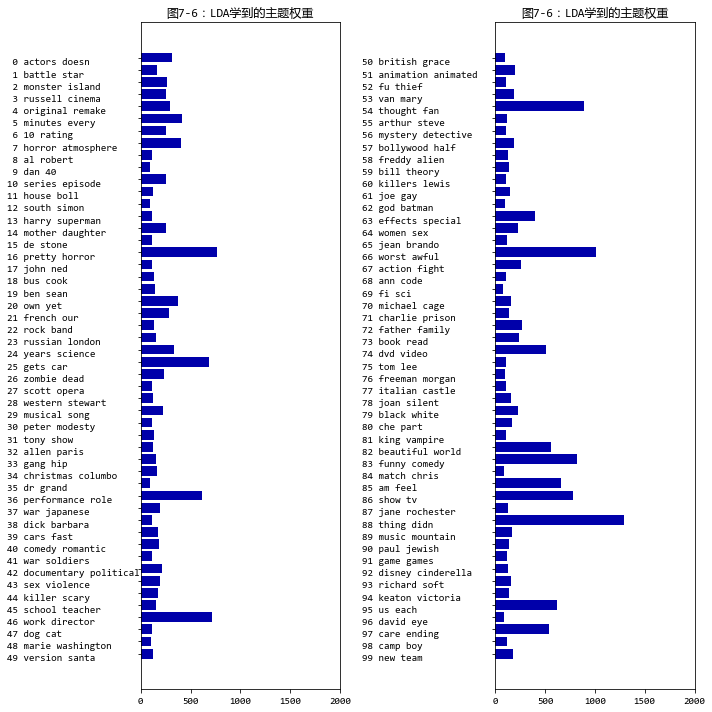

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]
# two column bar chart:
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    ax[col].set_title("图7-6：LDA学到的主题权重")
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

## 7.10 小结与展望

-   NLTK: "Natural Language Processing with Python"
-   IR: "Introduction to Information Retrieval"
-   使用连续向量表示，也叫做词向量（Word Vector）或者分布式词表示（Distributed Word Representation），在Word2Vec库中实现。
    -   "Distributed Representations of Words and Phrases and Their Compo sitionality"
-   递归神经网络（Recurrent Neural Network，RNN）进行文本处理，可以生成同样是文本的输出，适合自动翻译和摘要。
    -   "Sequence to Sequence Learning with Neural Networks"